In [ ]:
# Observable trend analysis

# Observation 1: The strongest correlation of studied atmospheric characteristics to latitude is maximum tempature.
# Observation 2: The weakest correlation between studied atmospheic characteristics to latitude was cloudiness with a wide distribution of % cloudness across all latitudes.
# Observation 3: Full cloud coverage at 100% as well as no cloud coverage at 0% occur across all laditudes.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

99f62900074692d8654988582765b53b


In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
cities_count

595

In [3]:
print('Beginning Data Retrieval')   
print('-----------------------------')
weather_results = []

for i in range (0, cities_count):
    lat_long = lat_lngs[i]
    lat = lat_long[0]
    long = lat_long[1]
    city = cities[i]

    print(f'Processing Record {i} | {city}')
    # Prevent rate limiting & locked account
    time.sleep(1.1)
    
    # Calling weather API for current weather data
    weather_response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={long}&APPID={api_key}")
    if weather_response.status_code == 200:
        json = weather_response.json()
        temp_max = json['main']['temp_max']
        humidity = json['main']['humidity']
        wind_speed = json['wind']['speed']
        cloudiness = json['clouds']['all']
        latitude = json['coord']['lat']
        longitude = json['coord']['lon']
        country = json['sys'].get('country', 'N/A')
        dt = json['dt']
        weather_results.append({ 'city': city, 'cloudiness': cloudiness, 'country': country, 'date': dt, 'humidity': humidity, 'lat': latitude, 'lng': longitude, 'max_temp': temp_max, 'max_speed': wind_speed})
    
    else:
        print("City not found. Skipping ...")
        
print('-----------------------------')
print('Data Retrieval Complete')     
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 0 | bluff
Processing Record 1 | ravar
Processing Record 2 | ulaangom
Processing Record 3 | jamestown
Processing Record 4 | igbon
Processing Record 5 | muroto
Processing Record 6 | attawapiskat
Processing Record 7 | alofi
Processing Record 8 | bengkulu
Processing Record 9 | rikitea
Processing Record 10 | taolanaro
Processing Record 11 | kiunga
Processing Record 12 | fukue
Processing Record 13 | kapaa
Processing Record 14 | cape town
Processing Record 15 | burnie
Processing Record 16 | qaqortoq
Processing Record 17 | kalmunai
Processing Record 18 | hermanus
Processing Record 19 | la union
Processing Record 20 | kloulklubed
Processing Record 21 | sorland
Processing Record 22 | hilo
Processing Record 23 | port blair
Processing Record 24 | butaritari
Processing Record 25 | ponta do sol
Processing Record 26 | avarua
Processing Record 27 | georgetown
Processing Record 28 | busselton
Processing Record 29 | longyearbyen
Pr

Processing Record 247 | caravelas
Processing Record 248 | sistranda
Processing Record 249 | buraydah
Processing Record 250 | saint-leu
Processing Record 251 | inta
Processing Record 252 | troitskoye
Processing Record 253 | takoradi
Processing Record 254 | rungata
Processing Record 255 | fremont
Processing Record 256 | cherskiy
Processing Record 257 | lavrentiya
Processing Record 258 | phan rang
Processing Record 259 | saint-pierre
Processing Record 260 | sorong
Processing Record 261 | carauari
Processing Record 262 | ust-koksa
Processing Record 263 | yima
Processing Record 264 | darhan
Processing Record 265 | buseresere
Processing Record 266 | chase
Processing Record 267 | peleduy
Processing Record 268 | bossembele
Processing Record 269 | okhotsk
Processing Record 270 | tiksi
Processing Record 271 | hithadhoo
Processing Record 272 | cruz alta
Processing Record 273 | vila do maio
Processing Record 274 | methoni
Processing Record 275 | gumdag
Processing Record 276 | hasaki
Processing Rec

Processing Record 493 | mahenge
Processing Record 494 | lianzhou
Processing Record 495 | savannah bight
Processing Record 496 | igrim
Processing Record 497 | hamilton
Processing Record 498 | baherden
Processing Record 499 | husavik
Processing Record 500 | erechim
Processing Record 501 | bacuit
Processing Record 502 | paracuru
Processing Record 503 | yulara
Processing Record 504 | brodokalmak
Processing Record 505 | nadym
Processing Record 506 | zhigansk
Processing Record 507 | smithers
Processing Record 508 | freeport
Processing Record 509 | anuppur
Processing Record 510 | great falls
Processing Record 511 | drumheller
Processing Record 512 | acarau
Processing Record 513 | adrar
Processing Record 514 | rudbar
Processing Record 515 | coruripe
Processing Record 516 | mountain home
Processing Record 517 | waipawa
Processing Record 518 | pierre
Processing Record 519 | klyuchi
Processing Record 520 | mizdah
Processing Record 521 | inhambane
Processing Record 522 | antofagasta
Processing Rec

In [4]:

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

    # Write the second row
    for weather_dictionary in weather_results:
        csvwriter.writerow([weather_dictionary['city'], weather_dictionary['cloudiness'], weather_dictionary['country'], weather_dictionary['date'], weather_dictionary['humidity'], weather_dictionary['lat'], weather_dictionary['lng'], weather_dictionary['max_temp'], weather_dictionary['max_speed']])

In [5]:
#Create Dataframe  
weather_df = pd.DataFrame(weather_results)
weather_df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_speed,max_temp
0,bluff,100,N/A,1570673656,96,-87.22,177.63,21.27,-43.89
1,ravar,0,IR,1570673657,19,31.53,58.20,10.60,72.10
2,ulaangom,0,MN,1570673659,28,47.18,92.30,3.35,40.08
3,jamestown,100,N/A,1570673660,73,-26.19,-1.35,20.26,61.84
4,igbon,94,PH,1570673662,73,11.12,123.24,8.93,83.43


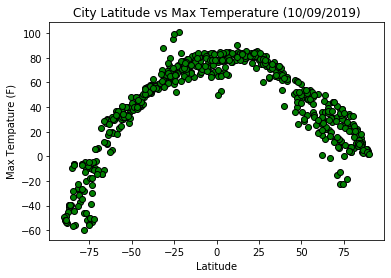

In [6]:
lat_tempature = weather_df.copy()[['lat', 'max_temp']]

# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lat_tempature['lat'],lat_tempature['max_temp'], marker="o", facecolors="green", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Max Temperature (10/09/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")

 # Save an image of the chart and print to screen
plt.savefig("../WeatherPy/City-Latitude-vs-Max-Tempature.png")
plt.show()

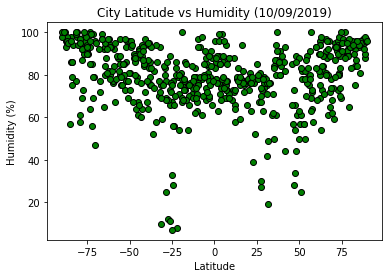

In [7]:
#Latitude vs. Humidity Plot
lat_humidity = weather_df.copy()[['lat', 'humidity']]

# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lat_humidity['lat'],lat_humidity['humidity'], marker="o", facecolors="green", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Humidity (10/09/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

 # Save an image of the chart and print to screen
plt.savefig("../WeatherPy/City-Latitude-vs-Humidity.png")
plt.show()

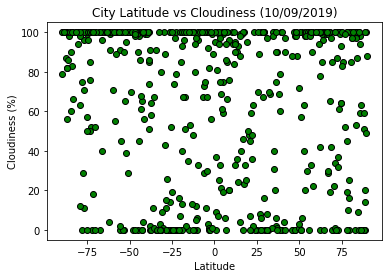

In [8]:
# Latitude vs. Cloudiness Plot
lat_cloudiness = weather_df.copy()[['lat', 'cloudiness']]

# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lat_cloudiness['lat'],lat_cloudiness['cloudiness'], marker="o", facecolors="green", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Cloudiness (10/09/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

 # Save an image of the chart and print to screen
plt.savefig("../WeatherPy/City-Latitude-vs-cloudiness.png")
plt.show()

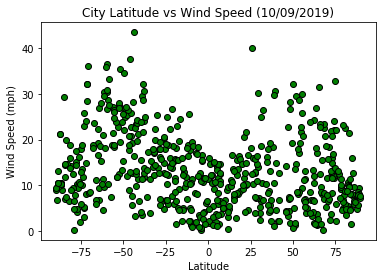

In [9]:
# Latitude vs. Wind Speed Plot
lat_windspeed = weather_df.copy()[['lat', 'max_speed']]


# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lat_windspeed['lat'],lat_windspeed['max_speed'], marker="o", facecolors="green", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Wind Speed (10/09/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

 # Save an image of the chart and print to screen
plt.savefig("../WeatherPy/City-Latitude-vs-windspeed.png")
plt.show()